## Machine Learning - Ex.3


Submitted by: [Osnat Haj Yahia]

In [169]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Part I - Linear classifier

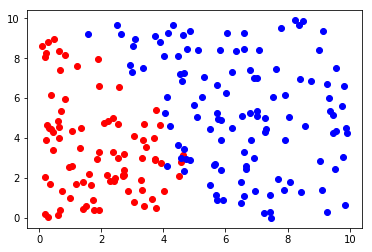

In [170]:
# generate the training data:

N = 200

x = np.random.random((N,2))*10

X = np.concatenate((np.ones((N,1)),x),axis=1);
w = np.array([-16,3,1])
z = np.dot(X,w)
h = 1/(1+np.exp(-z))
r = np.random.rand(N)
y = np.zeros(N)
y[r<h] = 1



plt.plot(x[y==0,0],x[y==0,1],'or')
plt.plot(x[y==1,0],x[y==1,1],'ob')
plt.show()

Implement a gradient descent algorithm to solve the logistic regression problem:


Next, use your algorithm to learn a linear classifier for the given data,

$$  y(x;w) =  \begin{cases}
        1, & g(w^\top x)\geq 0.5\\
       0, & g(w^\top x) < 0.5\\
        \end{cases} 
        $$
        
where, $w^\top x=w_0+w_1 x_1 + w_2 x_2$
        
and, $g(\cdot)$ is a sigmoid function:

$$ g(z)=\frac{1}{1+e^{-z}} $$

- Plot the original data points and mark (e.g., with yellow circles) any misclassified point.
- Draw the linear decision boundary ($w^\top x=0.5$).
- Try to plot the a colormap of the 2-D function $g(w^\top x)$ on the same plot.

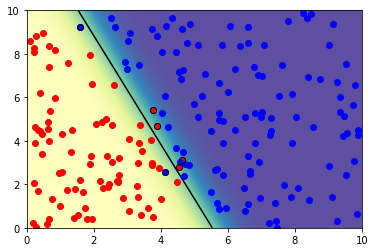

In [171]:
def gradient_descent (X, y , alpha ,number_of_iteration):
    J = np.zeros(number_of_iteration) # to hold the cost function value J at each iteration
    N,d = X.shape
    w = np.zeros(d)

    for i in range(number_of_iteration):
        x_trans = X.transpose()
        z= np.dot(w,x_trans)
        y_hat = 1/(1+np.exp(-z))
        w = w - alpha * (np.dot(x_trans,y_hat-y))
        
    return w

def calc_sigmoid(XX1,XX2,w):
    a = w[0] + w[1]*XX1 + w[2]*XX2
    sigmoid=1/(1+np.exp(-a))
    return sigmoid

        
def errors(x,y,w,b):
    C = np.array([[None,None]])
    N = len(x)
    if b == 0:
        for i in range(N):
            yy =-(w[0]+w[1]*x[i])/w[2]
            if y[i] > yy:
                c = np.array([[x[i],y[i]]])
                C = np.concatenate((C,c),axis=0)
    if b == 1:
        for i in range(N):
            yy =-(w[0]+w[1]*x[i])/w[2]
            if y[i] <yy:
                c = np.array([[x[i],y[i]]])
                C = np.concatenate((C,c),axis=0)
    return C     


 
xx1 = np.linspace(0,10,100)
xx2 = np.linspace(0,10,100)
XX1,XX2 = np.meshgrid(xx1,xx2)

#find the minimum weight
alpha = 0.001
number_of_iteration = 10000
w = gradient_descent(X,y , alpha , number_of_iteration) 


C1 = errors(x[y==0,0],x[y==0,1],w,0)
C2 = errors(x[y==1,0],x[y==1,1],w,1)

plt.plot(x[y==0,0],x[y==0,1],'or',x[y==1,0],x[y==1,1],'ob')
plt.plot(C1[:,0],C1[:,1],'ok',mfc='none')
plt.plot(C2[:,0],C2[:,1],'ok',mfc='none')
plt.ylim({0,10})
plt.contourf(XX1,XX2, calc_sigmoid(XX1,XX2,w), np.arange(-1,1.001,0.001), alpha=1, cmap='Spectral')
plt.contour(XX1,XX2, calc_sigmoid(XX1,XX2,w), 1, colors='black')

plt.show()

### Part II - Non-linear classifier

In this part you are given sample points in 2-D, which are not linearly seperable. 

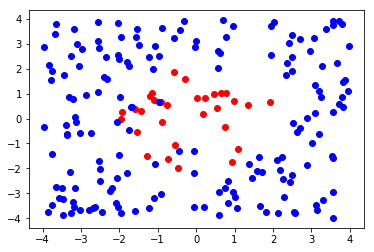

In [172]:
N= 200

x = np.random.random((N,2))*8-4

X = np.concatenate((np.ones((N,1)),x,x**2),axis=1);
w = np.array([-4,0,0,1,1])
z = np.dot(X,w)
h = 1/(1+np.exp(-z))
r = np.random.rand(N)
y = np.zeros(N)
y[r<h] = 1



plt.plot(x[y==0,0],x[y==0,1],'or')
plt.plot(x[y==1,0],x[y==1,1],'ob')
plt.show()

Use the same algoirthm from part I, to find a non-linear classifier:

$$  y(x;w) =  \begin{cases}
        1, & g(w^\top x)\geq 0.5\\
       0, & g(w^\top x) < 0.5\\
        \end{cases} 
        $$
        
where, $w^\top x=w_0+w_1 x_1 + w_2 x_2 + w_3 {x_1}^2 + w_4 {x_2}^2$
        
and, $g(\cdot)$ is a sigmoid function:

$$ g(z)=\frac{1}{1+e^{-z}} $$

- Plot the original data points and mark (e.g., with yellow circles) any misclassified point.
- Draw the linear decision boundary ($w^\top x=0.5$).
- Try to plot the a colormap of the 2-D function $g(w^\top x)$ on the same plot.

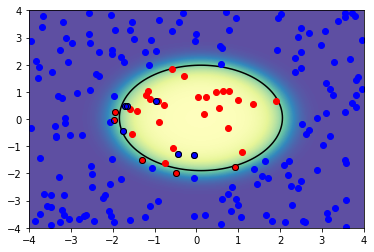

In [173]:
# your code here..
def calc_sigmoid(XX1,XX2,w):
    a = w[0] + w[1]*XX1 + w[2]*XX2 + w[3]*XX1**2 + w[4]*XX2**2
    sigmoid=1/(1+np.exp(-a))
    return sigmoid


def errors(x,y,w,b):
    C = np.array([[None,None]])
    N = len(x)
    if b == 0:
        for i in range(N):
            w0 = -w[1]*x[i] - w[2]*y[i] - w[3]*x[i]**2 - w[4]*y[i]**2
            if w0<w[0]:
                c = np.array([[x[i],y[i]]])
                C = np.concatenate((C,c),axis=0)
    if b == 1:
        for i in range(N):
            w0 = -w[1]*x[i] - w[2]*y[i] - w[3]*x[i]**2 - w[4]*y[i]**2
            if w0>w[0]:
                c = np.array([[x[i],y[i]]])
                C = np.concatenate((C,c),axis=0)
    return C     
    


xx1 = np.linspace(-4,4,100)
xx2 = np.linspace(-4,4,100)
XX1,XX2 = np.meshgrid(xx1,xx2)

alpha = 0.001
number_of_iteration = 10000
w = gradient_descent(X,y , alpha , number_of_iteration) 


C1 = errors(x[y==0,0],x[y==0,1],w,0)
C2 = errors(x[y==1,0],x[y==1,1],w,1)


plt.plot(x[y==0,0],x[y==0,1],'or',x[y==1,0],x[y==1,1],'ob')

plt.plot(C1[:,0],C1[:,1],'ok',mfc='none')
plt.plot(C2[:,0],C2[:,1],'ok',mfc='none')


plt.contourf(XX1,XX2,calc_sigmoid(XX1,XX2,w), np.arange(-1,1.001,0.001), alpha=1, cmap='Spectral')
plt.contour(XX1,XX2,calc_sigmoid(XX1,XX2,w), 1, colors='black')
plt.show()

## Good luck !